In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('test_4.csv')
df.describe(include='all')

,speaker,party,speech
count,84,41,84
unique,35,13,84
top,Doris Bures,SPÖ,"Dr. Pamela Rendi-Wagner,\n\nMSc ................."
freq,24,7,1


In [43]:
df.isnull().sum()

speaker     0
party      43
speech      0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df['speech_length'] = df['speech'].apply(lambda x: len(str(x).split()))
df['speech_length'].describe()

count      84.000000
mean      443.035714
std       857.468570
min         3.000000
25%        10.000000
50%        51.500000
75%       649.500000
max      6735.000000
Name: speech_length, dtype: float64

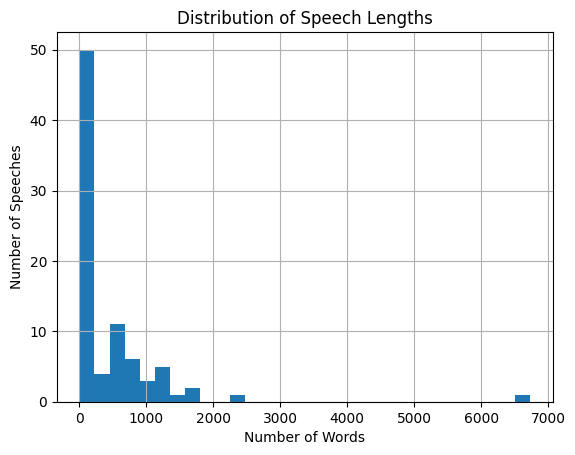

In [46]:
df['speech_length'].hist(bins=30)
plt.xlabel('Number of Words')
plt.ylabel('Number of Speeches')
plt.title('Distribution of Speech Lengths')
plt.show()

In [47]:
avg_speech_length = df.groupby('speaker')['speech_length'].mean().sort_values(ascending=False)
avg_speech_length

speaker
Mag. WolfgangSobotka                        6735.000000
Dr. Pamela Rendi-Wagner, MSc                2349.000000
MMag. Dr. Susanne Raab                      1413.000000
Mag. Meri Disoski                           1314.000000
Sebastian Kurz                              1174.000000
Rosa Ecker, MBA                             1159.000000
Edith Mühlberghuber                         1127.000000
Dr. Elisabeth Götze                         1057.000000
Michael Bernhard                            1011.000000
Henrike Brandstötter                         930.000000
Dipl.-Kffr. (FH) Elisabeth Pfurtscheller     905.000000
Dr. Susanne Fürst                            861.000000
Dr. Dagmar Belakowitsch                      831.000000
Fiona Fiedler, BEd                           825.000000
Mag. Martina Künsberg Sarre                  707.000000
Mag. Dr. Martin Kocher                       684.000000
MMMag. Gertraud Salzmann                     661.000000
Sigrid Maurer, BA                       

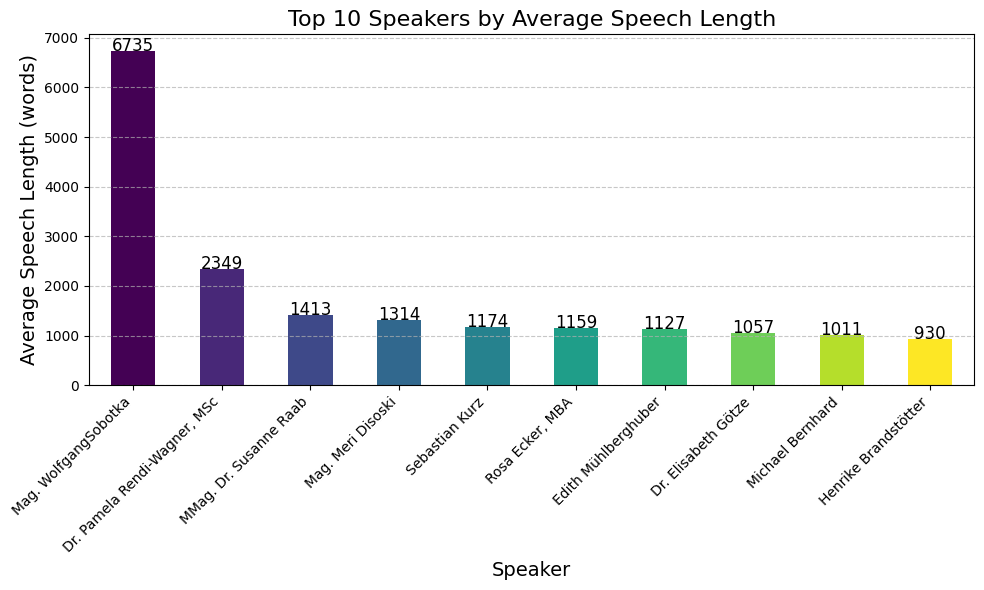

In [48]:
top_speaker_amount = 10  
topk = avg_speech_length.head(top_speaker_amount)

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, top_speaker_amount))
topk.plot(kind='bar', color=colors)

plt.title(f'Top {top_speaker_amount} Speakers by Average Speech Length', fontsize=16)
plt.xlabel('Speaker', fontsize=14)
plt.ylabel('Average Speech Length (words)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(topk):
    plt.text(i, v + 1, int(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [49]:
party_counts = df['party'].value_counts()
party_counts

party
SPÖ                                                                                                          7
FPÖ                                                                                                          6
Grüne                                                                                                        5
ÖVP                                                                                                          5
NEOS                                                                                                         4
fortsetzend                                                                                                  4
E                                                                                                            3
FH                                                                                                           2
Die Abgeordneten der Grünen\n\ntragen grüne Buttons mit dem Genderzeichen für Frau auf ihrer\n\nKleidung. 

In [56]:
# Calculate speech length if not already done
df['speech_length'] = df['speech'].apply(lambda x: len(str(x).split()))

# Group by party and sum the speech lengths
total_speech_party = df.groupby('party')['speech_length'].sum().sort_values(ascending=False)
total_speech_party

party
SPÖ                                                                                                          5633
FPÖ                                                                                                          4524
Grüne                                                                                                        3536
NEOS                                                                                                         3473
ÖVP                                                                                                          2393
FH                                                                                                           1810
fortsetzend                                                                                                  1795
E                                                                                                            1514
ohne\n\nKlubzugehörigkeit                                                         

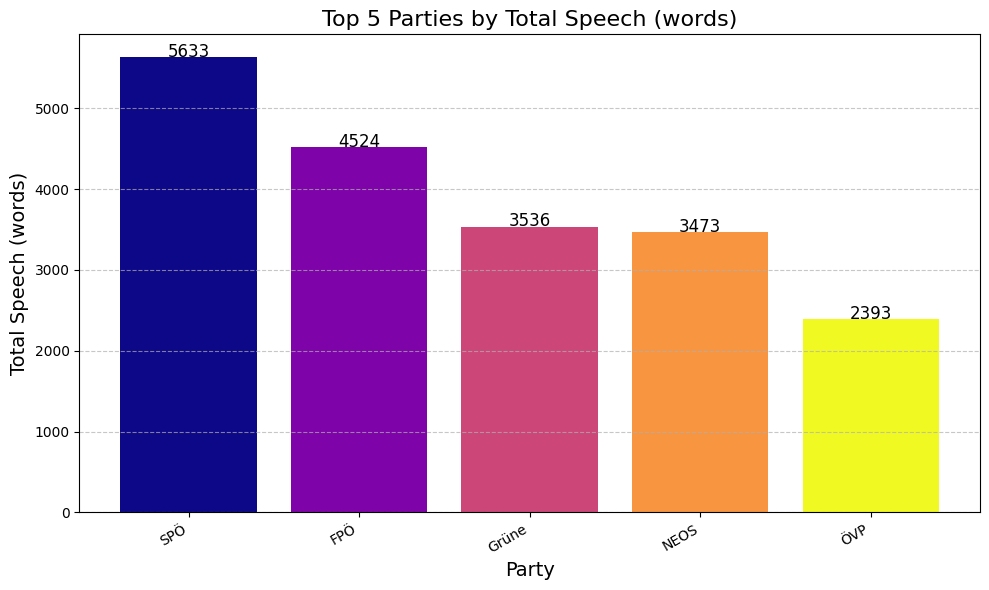

In [58]:

t_speech_part_amt = 5
topk_party = total_speech_party.head(t_speech_part_amt)

plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 1, t_speech_part_amt))
bars = plt.bar(topk_party.index, topk_party.values, color=colors)

plt.title(f'Top {t_speech_part_amt} Parties by Total Speech (words)', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Total Speech (words)', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{int(yval)}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()
